# Simple portfolio optimization. 
We consider a portfolio optimization problem as described on pages
155 and 185–186 of Convex Optimization.

## (a)
Find minimum-risk portfolios with the same expected return as the uniform portfolio ($w =
(1/n)1$), with risk measured by portfolio return variance, and the following portfolio constraints
(in addition to $1^Tw = 1$):

* No (additional) constraints.
* Long-only: $w \geq 0$.
* Limit on total short position: $1^T(w_-) \leq 0.5$, where $(w_-)_i = \max\{−w_i
, 0\}$.

Compare the optimal risk in these portfolios with each other and the uniform portfolio.

In [10]:
# Construct problem data.
import numpy as np

np.random.seed(1)
n = 20
mu = np.ones((n,1))*.03 + np.r_[np.random.rand(n-1,1), np.zeros((1,1))]*.12;
S = np.random.randn(n, n); S = np.asmatrix(S)
S = S.T*S
Sigma = S/max(np.abs(np.diag(S)))*.2
Sigma[:, -1] = np.zeros((n, 1))
Sigma[-1, :] = np.zeros((n, 1)).T
w_unif = np.ones((n, 1))/n; w_unit = np.asmatrix(w_unif)

In [ ]:
import cvxpy as cvx
w = cvx.Variable(n)

# Uniform portfolio
print 'Risk for uniform: %.2f%%' % float(np.sqrt(np.sum(mu)/n)*100)

# No additional constraints
# TODO: your code here

print 'Risk for unconstrained: %.2f%%' % float(np.sqrt(risk.value)*100)

# Long only
# TODO: your code here

print 'Risk for long only: %.2f%%' % float(np.sqrt(risk.value)*100)

# Limit on total short position
# TODO: your code here

print 'Risk for limit on short: %.2f%%' % float(np.sqrt(risk.value)*100)

## (c)

Plot the optimal risk-return trade-off curves for the long-only portfolio, and for total short position limited to 0.5, in the same figure. Follow the style of figure 4.12 (top) in Convex Optimization, with horizontal axis showing standard deviation of portfolio return, and vertical axis showing mean return.

Comment on the relationship between the two trade-off curves.

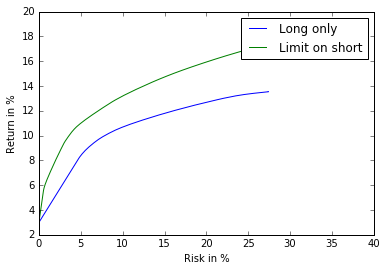

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

w = cvx.Variable(n)
gamma = cvx.Parameter(sign='positive')

N = 128
# Long only
# TODO: your code here

gamma_vals = np.logspace(-1,5,num=N)
return_vec1 = np.zeros((N,1))
risk_vec1 = np.zeros((N,1))
for i in range(N):
    gamma.value = gamma_vals[i]
    prob.solve()
    return_vec1[i] = expec_return.value
    risk_vec1[i] = risk.value
plt.figure()
plt.plot(np.sqrt(risk_vec1)*100, return_vec1*100, label='Long only')

# Limit on Short
# TODO: your code here

return_vec2 = np.zeros((N,1))
risk_vec2 = np.zeros((N,1))
for i in range(N):
    gamma.value = gamma_vals[i]
    prob.solve()
    return_vec2[i] = expec_return.value
    risk_vec2[i] = risk.value
    
plt.plot(np.sqrt(risk_vec2)*100, return_vec2*100, label='Limit on short')
plt.legend()
plt.xlabel('Risk in %')
plt.ylabel('Return in %')
plt.show()